# Ускорение и оптимальные методы    

## Основная часть

Рассмотрим задачу минимизации эмпирического риска:

\begin{equation}
\min_{x \in \mathbb{R}^d} \left[ f(x) = \frac{1}{n} \sum\limits_{i=1}^n \ell_x(a_i, b_i) + \frac{\lambda}{2} \| x \|^2_2\right],
\end{equation}

где:
- $\ell_x(a_i, b_i)$ — функция потерь (cross-entropy loss),
- $x$ — вектор параметров модели,
- $\{a_i, b_i\}_{i=1}^n$ — выборка данных,
- $\lambda > 0$ — параметр регуляризации.

Функция потерь для каждого объекта $i$ записывается как:

\begin{equation}
\ell_x(a_i, b_i) = -b_i \ln(p(x^Ta_i)) - (1 - b_i) \ln(1 - p(x^Ta_i)),
\end{equation}

где $p(x^Ta_i)$ — это вероятность, вычисляемая с помощью логистической функции в комбинации с линейной моделью:

\begin{equation}
p(x^Ta_i) = \frac{1}{1 + \exp(-x^T a_i)}.
\end{equation}




Подробнее почитать можно [здесь](https://habr.com/ru/articles/485872/) и [здесь](https://habr.com/ru/articles/803397/). Разобраться глубже можно [вот здесь](https://web.stanford.edu/~jurafsky/slp3/5.pdf), например.

__Задача 1. (всего 4 балла)__ Проведем подготовительную работу.


__а). (2 балла)__ Исследуем задачу на сильную выпуклость и липшицевость.

Докажите, что градиент нашей функции потерь равен:

\begin{equation}
\nabla f(x) = \frac{1}{n} \sum_{i=1}^n (p(x^Ta_i) - b_i) a_i + \lambda x
\end{equation}


__Ваше решение__

Сначала посчитаем градиент $p(x^Ta_i)$:

$$\nabla p = \nabla \frac{1}{1 + \exp(-x^T a_i)} = \frac{a_i \exp(-x^T a_i)}{(1 + \exp(-x^T a_i))^2} = a_i p (1 - p)$$

Теперь функцию потерь:

$$\nabla \ell_x(a_i, b_i) = \nabla (-b_i \ln(p) - (1 - b_i) \ln(1 - p)) = $$
$$ = -b_i \frac{\nabla p}{p} + (1 - b_i) \frac{\nabla p}{1 - p} = -b_i a_i (1 - p) + (1 - b_i) a_i p = $$
$$ = -a_i b_i + a_i p = (p - b_i) a_i$$

Получившееся выражение стоит в сумме. Производная $\frac{\lambda}{2} \| x \|^2_2$, очевидно, равна $\lambda x$. В итоге получаем
$$\frac{1}{n} \sum_{i=1}^n (p(x^Ta_i) - b_i) a_i + \lambda x$$

**ЧТД**



Докажите, что гессиан нашей функции потерь равен:

\begin{equation}
H(x) = \frac{1}{n} \sum_{i=1}^n \big(p(x^Ta_i)(1 - p(x^Ta_i))\big) a_i a_i^T + \lambda I,
\end{equation}

где $I$ — это единичная матрица.


__Ваше решение__

В предыдущем пункте показано, что $\nabla p = a_i p (1 - p)$. Это и формула градиента функции потерь даёт выражение под суммой (вектор $a_i$ транспонируется, так как в итоге должна получиться матрица). То, что Гессиан $\frac{\lambda}{2} \| x \|^2_2$ равен $\lambda I$, тоже очевидно. Складывая, получаем нужное выражение.

**ЧТД**

Докажите, что константа Липшица градиента $L$ может быть оценена как:

\begin{equation}
L = \frac{1}{4n} \lambda_{\max}(A^T A) + \lambda,
\end{equation}

где $A$ — матрица, составленная из строк $a_i^{T}$.

при доказательстве используйте, что она равна $\lambda_{\max}(H(x))$ (Теорема 2.1.6, стр. 87, [Методы
выпуклой оптимизации Ю. Е. Нестеров](https://old.mipt.ru/dcam/upload/abb/nesterovfinal-arpgzk47dcy.pdf)).


__Ваше решение__

Оценим максимальное собственное число Гессиана: для этого заметим, что выражение $p (1 - p)$, стоящее под суммой, не больше $\frac{1}{4}$, поскольку $p$ лежит на отрезке от 0 до 1. Тогда можно оценить $\lambda_{\max}(H(x))$ сверху максимальным собственным числом следующей матрицы:

$$\frac{1}{n} \sum_{i=1}^n \frac{1}{4} a_i a_i^T + \lambda I = \frac{1}{4n} A^T A + \lambda I$$

Итоговые выкладки:

$$L = \lambda_{\max}(H(x)) \leq \lambda_{\max}(\frac{1}{4n} A^T A + \lambda I) \leq \lambda_{\max}(\frac{1}{4n} A^T A) + \lambda$$

**ЧТД**


Теперь покажите, что задача $\mu$-сильно выпуклая, где $\mu = \lambda$. Для этого достаточно показать, что минимальное собственное значение $H(w)$ больше $\lambda$ (Теорема 6.9, стр. 83, [Пособие](https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2Fm9Htnh7F1wdW0MvhwL7AM4Z%2BzV%2FxsfJcEhRKSH8USLEzt3CIS9ukbzpBKfErQBxmq%2FJ6bpmRyOJonT3VoXnDag%3D%3D%3A%2F%D0%9F%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5.pdf&name=%D0%9F%D0%BE%D1%81%D0%BE%D0%B1%D0%B8%D0%B5.pdf&nosw=1)).


__Ваше решение__

Аналогично предыдущему пункту, выражение $p (1 - p)$ не меньше 0. Можно оценить $\lambda_{\min}(H(x))$ снизу собственным числом матрицы $\lambda I$, которое равно $\lambda$.

**ЧТД**

К заданию приложен датасет _mushrooms_. С помощью следующего кода сформируем матрицу $A$ и вектор $b$, в которой и будет храниться выборка $\{a_i, b_i\}_{i=1}^n$:

In [1]:
#файл должен лежать в той же деректории, что и notebook
dataset = "mushrooms.txt"

from sklearn.datasets import load_svmlight_file
data = load_svmlight_file(dataset)
A, b = data[0].toarray(), data[1]

b = b - 1

Разделим данные на две части: обучающую и тестовую.

__Важно:__ обязательно дальше при решении задания для обучения используйте train выборку, а для проверки test.

In [2]:
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)
print(A_train)
print(b_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 0. 0. ... 1. 0. 1.]


Зафиксируем seed для воспроизводимости. Для генерации случайных точек используйте созданный генератор `rng` ([документация](https://numpy.org/doc/stable/reference/random/generator.html)).

In [3]:
import numpy as np

seed = 42
rng = np.random.default_rng(seed)

__б). (0.5 балла)__ Для обучающей части $A_{train}$, $b_{train}$ оцените константу $L$. Задайте $\lambda$ так, чтобы $\lambda \approx L / 1000$.

In [4]:
# Ваше решение
n = A_train.shape[0]

eigvals = np.linalg.eigvals(A_train.T @ (A_train)) 
lambda_max = (np.max(eigvals) / (4 * n)).real
L = lambda_max # с точностью до 1/1000 
lmbd = L / 1000
mu = lmbd
print(f"L = {L}")
print(f"mu = {mu}")

L = 2.5846388628723007
mu = 0.0025846388628723007


__в). (1.5 балла)__ Реализуйте в коде подсчет значения и градиента для нашей целевой функции. При этом $A$, $b$, $\lambda$ необходимо подавать в качестве параметра, чтобы была возможность их менять.

Настоятельно рекомендуем использовать для этого только библиотеку ``numpy``.

In [6]:
# Ваше решение
def p_func(z):
    return 1.0 / (1.0 + np.exp(-z))

def f_func(x, A, b, lam=lmbd, eps=1e-10):
    n = A.shape[0]
    p = p_func(A @ x)
    return -np.mean(b * np.log(p + eps) + (1 - b) * np.log(1 - p + eps)) + lam * (x @ x) / 2

def grad_func(x, A, b, lam=lmbd, eps=1e-10):
    n = A.shape[0]
    p = p_func(A @ x)
    return (1 / n) * A.T.dot(p - b) + lam * x # .dot() работает быстрее, чем @

__Задача 2. (всего 6 баллов)__ Моментумом и ускорение.

__a). (0.5 балла)__ Реализуйте метод тяжелого шарика.

**Псевдокод алгоритма**

_Инициализация:_

Величина шага $\{ \gamma_k \}_{k=0} > 0$, моментумы $\{ \tau_k \}_{k=0} \in [0; 1]$, стартовая точка $ x^0 = x^{-1} \in \mathbb{R}^d $, количество итераций $ K $

_$k$-ая итерация:_
1. Подсчитать направление спуска $$ \nabla f(x^k) $$
2. Сделать шаг алгоритма $$ x^{k+1} = x^k - \gamma_k \nabla f(x^k) + \tau_k (x^k - x^{k-1}) $$

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки правильности загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/)

In [7]:
import numpy as np
from tqdm import trange

def HeavyBall(grad, criterion, A, b, x_0, eps, max_iter, **params):

    '''
       grad(x) - функция, которая считает градиент целевой функции;
       criterion(x) - функция, которая считает критерий;
       x_0 - начальная точка;
       eps - точность сходимости (обычно 1e-8);
       max_iter - количество итераций;
       **params - содержит именнованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации,
           params['tau'](k) - моментум, зависящий от номера итерации.
    '''

    errors = []

    x_k = np.copy(x_0)
    x_k_prev = np.copy(x_0)
    err_x_0 = criterion(x_k, A, b)
    errors.append(criterion(x_k, A, b) / err_x_0)
    for k in trange(max_iter):

        # Ваше решение
        gradient = grad(x_k, A, b)
        x_k_new = x_k - params['gamma'](k) * gradient + params['tau'](k) * (x_k - x_k_prev)
        x_k_prev = np.copy(x_k)
        x_k = np.copy(x_k_new)

        errors.append(criterion(x_k, A, b) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

__б). (1.5 балла)__ Решите задачу логистической регрессии с помощью метода тяжелого шарика на обучающей выборке.

- Используйте шаг $\frac{1}{L}$
- Рассмотрите моментум `tau_0` = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности
- Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации),
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$

Постройте график сходимости метода на тренировочной выборке от числа итераций для различных значений моментума.

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Разместите данные для различных моментумов на одном графике, укажите их в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._

In [10]:
# Ваше решение
x_0 = rng.random(A.shape[1])
# x_0 = np.random.randn(A.shape[1])
iterations = 1000
tau_0 = (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))
tau_array = [lambda k: 0.95 * tau_0, 
             lambda k: 0.975 * tau_0, 
             lambda k: tau_0,
             lambda k: 1.025 * tau_0, 
             lambda k: 1.05 * tau_0, 
             lambda k: k / (k + 1), 
             lambda k: k / (k + 2), 
             lambda k: k / (k + 3)]

print(f"tau_0 = {tau_0}")

def criterion(x, A, b, lam=lmbd):
    return np.linalg.norm(grad_func(x, A, b, lam)) / np.linalg.norm(grad_func(x_0, A, b, lam))

x_answers_hb = []
errors_hb = []
for tau in tau_array:
    x_final, err = HeavyBall(grad_func, criterion, A_train, b_train, x_0, eps=1e-8, max_iter=iterations,
                             gamma=lambda k: 1/L, tau=tau)
    x_answers_hb.append(x_final)
    errors_hb.append(err)

tau_0 = 0.938693139936569


100%|████████████████████████████████████████| 1000/1000 [00:00<00:00, 1057.01it/s]


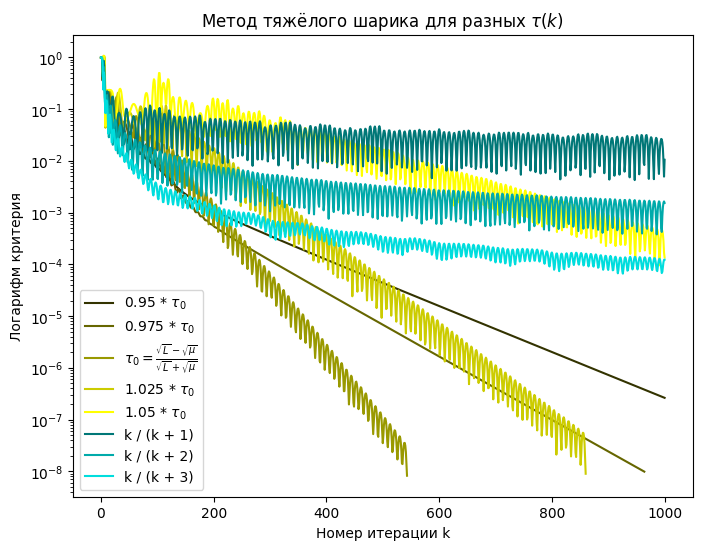

In [13]:
# Ваше решение (график)
import matplotlib.pyplot as plt

colors = ["#333300", "#666600", "#999900", "#cccc00", "#ffff00", "#007777", "#00aaaa", "#00dddd"]
tau_names = [r"0.95 * $\tau_0$", 
             r"0.975 * $\tau_0$", 
             r"$\tau_0 = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$",
             r"1.025 * $\tau_0$", 
             r"1.05 * $\tau_0$", 
             "k / (k + 1)", 
             "k / (k + 2)", 
             "k / (k + 3)"]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for err, tau, col in zip(errors_hb, tau_names, colors):
    ax.plot(err, label=tau, color=col)
    ax.set_yscale('log')
    ax.set_title(r"Метод тяжёлого шарика для разных $\tau(k)$")
    ax.set_xlabel(r"Номер итерации k")
    ax.set_ylabel(r"Логарифм критерия")
    ax.legend()

In [ ]:
# Ваше решение (лучшее значение параметра)

__в). (0.5 балла)__ Постройте график сходимости на тестовой выборке от числа итераций.

- Используйте шаг $\frac{1}{L}$
- Значения моментума — лучшее из предыдущего пункта
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$



По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимость градиентного спуска с шагом $\frac{1}{L}$, укажите обе сходимости в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._



  0%|          | 0/1000 [00:00<?, ?it/s]

 55%|██████████████████████▎                  | 545/1000 [00:00<00:00, 1771.87it/s]


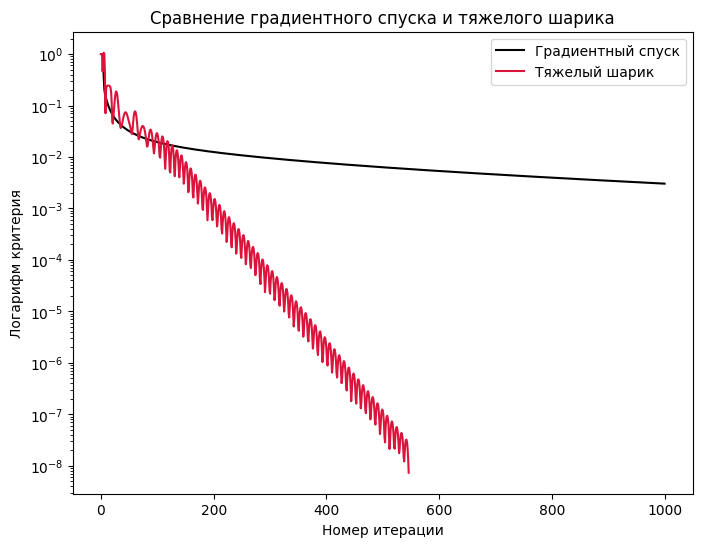

In [15]:
# Ваше решение
from tqdm.autonotebook import tqdm
import numpy as np

def GradientDescent(grad, criterion, A, b, x_0, eps, max_iter, **params):

    '''
       grad(x) - функция, которая считает градиент целевой функции;
       criterion(x) - функция, которая считает критерий;
       x_0 - начальная точка;
       eps - точность сходимости (обычно 1e-8);
       max_iter - количество итераций;
       **params - содержит именнованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации.
    '''

    errors = []

    x_k = np.copy(x_0)
    err_x_0 = criterion(x_k, A, b)
    errors.append(criterion(x_k, A, b) / err_x_0)
    for k in tqdm(range(max_iter)):

        # your code
        x_k = x_k - params['gamma'](k) * grad(x_k, A, b)

        errors.append(criterion(x_k, A, b) / err_x_0)
        if errors[-1] < eps:
            break

    return x_k, errors

x_k_gd, errors_gd_test = GradientDescent(grad_func, criterion, A_test, b_test, x_0, eps=1e-8, max_iter=iterations,
                                         gamma=lambda k: 1/L)
x_k_hb, errors_hb_test = HeavyBall(grad_func, criterion, A_test, b_test, x_0, eps=1e-8, max_iter=iterations, 
                                   gamma=lambda k: 1/L, tau=lambda k: tau_0)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(errors_gd_test, color="black", label="Градиентный спуск")
ax.plot(errors_hb_test, color="crimson", label="Тяжелый шарик")
ax.set_yscale('log')
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм критерия")
ax.set_title("Сравнение градиентного спуска и тяжелого шарика")
ax.legend()
plt.show()

In [ ]:
# Ваше решение (график)

__г). (0.5 балла)__ Реализуйте ускоренный градиентный метод

**Псевдокод алгоритма**

_Инициализация:_

Величина шага $ \{ \gamma_k \}_{k=0} > 0 $, моментум $ \{ \tau_k \}_{k=0} \in [0; 1] $, стартовая точка $ x^0 = y^0 \in \mathbb{R}^d $, количество итераций $ K $

_$k$-ая итерация:_
1. Подсчитать направление спуска $$ \nabla f(y^k) $$
2. Сделать шаг алгоритма $$ x^{k+1} = y^k - \gamma_k \nabla f(y^k) $$
3. Вычислить новую точку для подсчета градиента на следующем шаге $$ y^{k+1} = x^{k+1} + \tau_k (x^{k+1} - x^k) $$

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты. После чего для проверки правильности загрузите функцию в [контест](https://contest.yandex.ru/contest/66540/enter/)

In [16]:
import numpy as np
from tqdm import trange

def NAG(grad, criterion, A, b, x_0, eps, max_iter, **params):
    '''
       grad(x) - функция, которая считает градиент целевой функции;
       criterion(x) - функция, которая считает критерий;
       x_0 - начальная точка;
       eps - точность сходимости (обычно 1e-8);
       max_iter - количество итераций;
       **params - содержит именнованные гиперпараметры метода:
           params['gamma'](k) - шаг, зависящий от номера итерации,
           params['tau'](k) - моментум, зависящий от номера итерации.
    '''
    errors = []

    x_k = np.copy(x_0)
    y_k = np.copy(x_0)
    err_x_0 = criterion(x_k, A, b)
    errors.append(criterion(x_k, A, b) / err_x_0)
    delta = np.zeros_like(x_0)

    for k in trange(max_iter):

        # Ваше решение
        gradient = grad(y_k, A, b)
        x_k_new = y_k - params['gamma'](k) * gradient
        y_k_new = x_k_new + params['tau'](k) * (x_k_new - x_k)
        x_k = np.copy(x_k_new)
        y_k = np.copy(y_k_new)

        errors.append(criterion(x_k, A, b) / err_x_0)
        if errors[-1] < eps:
            break
    return x_k, errors

__д). (1.5 балла)__ Решите задачу логистической регрессии с помощью ускоренного градиентного метода на обучающей выборке.

- Используйте шаг $\frac{1}{L}$
- Рассмотрите моментум `tau_0` = $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ и несколько моментумов в его окрестности
- Рассмотрите моментумы равные  $\frac{k}{k+3}$, $\frac{k}{k+2}$, $\frac{k}{k+1}$ ($k$ — номер итерации),
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$

Постройте график сходимости метода на тренировочной выборке от числа итераций для различных значений моментума.

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Разместите данные для различных моментумов на одном графике, укажите их в легенде, при этом для моментумов, полученных по формулам, обязательно в легенде указывать именно формулу, а для $\frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$ дополнительно укажите в скобках значение.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._

In [17]:
# Ваше решение

iterations = 1000
tau_0 = (np.sqrt(L) - np.sqrt(mu)) / (np.sqrt(L) + np.sqrt(mu))
tau_array = [lambda k: 0.95 * tau_0, 
             lambda k: 0.975 * tau_0, 
             lambda k: tau_0,
             lambda k: 1.025 * tau_0, 
             lambda k: 1.05 * tau_0, 
             lambda k: k / (k + 1), 
             lambda k: k / (k + 2), 
             lambda k: k / (k + 3)]
print(f"tau_0 = {tau_0}")

def criterion(x, A, b, lam=lmbd):
    return np.linalg.norm(grad_func(x, A, b, lam)) / np.linalg.norm(grad_func(x_0, A, b, lam))

x_answers_nag = []
errors_nag = []
for tau in tau_array:
    x_final, err = NAG(grad_func, criterion, A_train, b_train, x_0, eps=1e-8, max_iter=iterations,
                             gamma=lambda k: 1/L, tau=tau)
    x_answers_nag.append(x_final)
    errors_nag.append(err)

tau_0 = 0.938693139936569


100%|████████████████████████████████████████| 1000/1000 [00:00<00:00, 1029.26it/s]


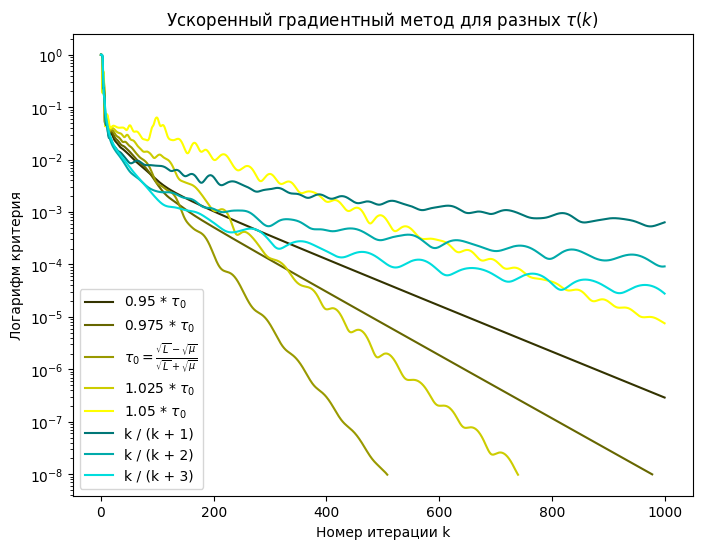

In [19]:
# Ваше решение (график)
import matplotlib.pyplot as plt

colors = ["#333300", "#666600", "#999900", "#cccc00", "#ffff00", "#007777", "#00aaaa", "#00dddd"]
tau_names = [r"0.95 * $\tau_0$", 
             r"0.975 * $\tau_0$", 
             r"$\tau_0 = \frac{\sqrt{L} - \sqrt{\mu}}{\sqrt{L} + \sqrt{\mu}}$",
             r"1.025 * $\tau_0$", 
             r"1.05 * $\tau_0$", 
             "k / (k + 1)", 
             "k / (k + 2)", 
             "k / (k + 3)"]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
for err, tau, col in zip(errors_nag, tau_names, colors):
    ax.plot(err, label=tau, color=col)
    ax.set_yscale('log')
    ax.set_title(r"Ускоренный градиентный метод для разных $\tau(k)$")
    ax.set_xlabel(r"Номер итерации k")
    ax.set_ylabel(r"Логарифм критерия")
    ax.legend()

In [ ]:
# Ваше решение (лучшее значение параметра)

__е). (1.5 балла)__ Постройте график сходимости на тестовой выборке от числа итераций.

- Используйте шаг $\frac{1}{L}$
- Значения моментума — лучшее из предыдущего пункта
- Стартовая точка $x^0$ — случайная, одинаковая для всего задания
- Критерий $\frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|}$


По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимости из пункта в), укажите все три сходимости в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._



 51%|████████████████████▋                    | 506/1000 [00:00<00:00, 1659.14it/s]


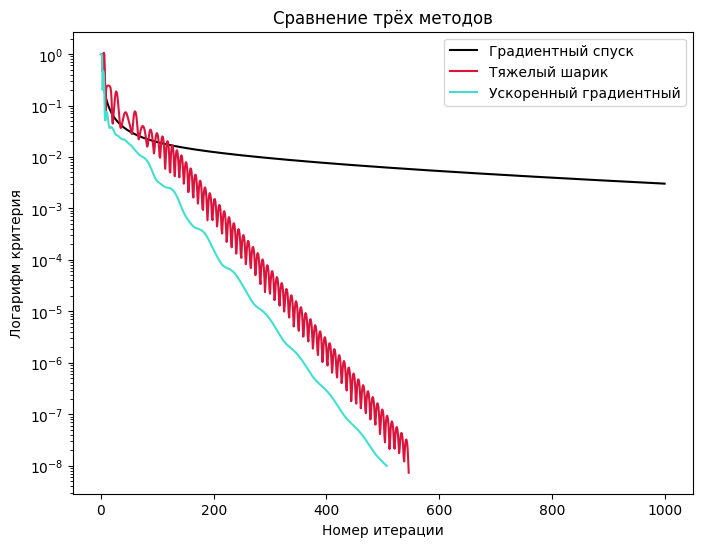

In [20]:
# Ваше решение
x_k_nag, errors_nag_test = NAG(grad_func, criterion, A_test, b_test, x_0, eps=1e-8, max_iter=iterations, 
                                   gamma=lambda k: 1/L, tau=lambda k: tau_0)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(errors_gd_test, color="black", label="Градиентный спуск")
ax.plot(errors_hb_test, color="crimson", label="Тяжелый шарик")
ax.plot(errors_nag_test, color="turquoise", label="Ускоренный градиентный")
ax.set_yscale('log')
ax.set_xlabel("Номер итерации")
ax.set_ylabel("Логарифм критерия")
ax.set_title("Сравнение трёх методов")
ax.legend()
plt.show()

In [ ]:
# Ваше решение (график)

# Дополнительная часть

__Задача 1. (всего 4 балла)__

__а). (1 балл)__ Вспомним, что исходная задача регрессии является задачой машинного обучения и с помощью линейной модели $x^T a$ можно предсказывать значения меток $b$. Как использовать итоговую модель для предсказания?

__Ваше решение__

__б). (0.5 балла)__ Ответив на вопрос, напишите функцию, которая делает предсказания на тестовой выборке $A_{test}$. Сравните с реальными метками $b_{test}$. Количество правильно угаданных меток есть точность/accuracy модели.

In [ ]:
# Ваше решение

__в). (2.5 балла)__ Сравните метод градиентного спуска, метод тяжелого шарика, ускоренный градиентный метод. Постройте два графика: значение критерия сходимости от номера итерации и точность предсказания от номера итерации.

In [ ]:
# Ваше решение

In [ ]:
# Ваше решение (график)

__Задача 2. (всего 6 баллов)__ Универсальное ускорение (на основании [статьи](https://arxiv.org/pdf/1506.02186))


Catalyst (катализатор) — это универсальная техника, которая придумана, чтобы ускорять любые методы, в частности, самый простой вариант, например, ускорить градиентный спуск, но, по факту, может быть подставлен абсолютно любой метод. Суть этого задания — проверить, какой способ ускорения градиентного спуска лучше: универсальный Catalyst или заточенные конкретно под градиентный спуск техники (ускоренный градиентный спуск Нестерова и метод тяжелого шарика).

__a). (1 балл)__ Реализуйте схему ускорения Catalyst для градиентного спуска.

Основная идея заключается в том, что мы добавляем к целевой функции слагаемое вида $\frac{\kappa}{2} \| x - y_{k-1} \|^2$, где $\kappa$ — гиперпараметр, о котором мы поговорим поздее, а $y_k$ — экстраполяция решения "по инерции", как мы делали в методах основной части этого задания. Скорость сходимости градиентого спуска, как известно, зависит от, так называемой, обусловленности задачи, а именно $\frac{L}{\mu}$. Нетрудно убедиться, (если коротко, поправка к гессиану будет вида $\kappa I$, из-за чего все его собственные значения увеличатся на $\kappa$) что у новой целевой функции число обусловленности будет равно  $\frac{L + \kappa}{\mu + \kappa}$. Чем ближе это число к единице, тем быстрее сходимость. Очевидно, положительный параметр $\kappa$ увеличивает число обусловленности, и вот, поэтому, теоретическая сходимость становится лучше. С другой стороны, для не сильно выпуклых задач, то есть $\mu = 0$, параметр $\kappa$ выступает, в каком-то смысле, в роле регуляризатора, и делает задачу сильно выпуклой.

Теперь запишем эту схему для произвольного алгоритма $A$.

**Псевдокод алгоритма**

_Инициализация:_

Начальное приближение $ x_0 \in \mathbb{R}^p $, параметры $ \kappa $ и $ \alpha_0 $, последовательность $ \{ \varepsilon_k \}_{k \geq 0} $, метод оптимизации — $A$.

Также необходимо задать следующим образом некоторые из параметров: $$ q = \frac{\mu}{\mu + \kappa}, \quad y_0 = x_0 $$

_$k$-ая итерация:_
   1. Найти приближённое решение следующей задачи с использованием метода $A$:
   $$
   x_k \approx \arg \min_{x \in \mathbb{R}^p} \left\{ G_k(x) = F(x) + \frac{\kappa}{2} \| x - y_{k-1} \|^2 \right\},
   \quad \text{т. ч.} \quad
   G_k(x_k) - G^*_k \leq \varepsilon_k.
   $$
   2. Вычислить $ \alpha_k \in (0, 1) $ из уравнения:
   $$
   \alpha_k^2 = (1 - \alpha_k) \alpha_{k-1}^2 + q \alpha_k .
   $$
   3. Вычислить:
   $$
   y_k = x_k + \beta_k (x_k - x_{k-1}),
   \quad \text{где} \quad
   \beta_k = \frac{\alpha_{k-1} (1 - \alpha_{k-1})}{\alpha_{k-1}^2 + \alpha_k}.
   $$


Теперь давайте ускорим с помощью этой схемы градиентный спуск, то есть возьмём его в качестве алгоритма $A$.

Используйте предложенную функцию для реализации алгоритма и допишите недостающие фрагменты.

In [ ]:
import numpy as np
from tqdm import tqdm

def catalyst_method(method_A, grad, criterion, x_0, eps, max_iter, **params):
    '''
    grad(x) - функция, которая считает градиент целевой функции;
    criterion(x) - функция, которая считает критерий;
    x_0 - начальная точка;
    eps - точность сходимости;
    max_iter - количество итераций;
    method_A - оптимизационный метод (например, градиентный спуск);
    **params - гиперпараметры метода:
        params['kappa'] - параметр регуляризации,
        params['alpha_0'] - начальное значение альфа,
        params['mu'] - сильно выпуклый параметр задачи,
        params['epsilon_k'] - последовательность точностей для задачи.
    '''

    errors = []

    x_k = np.copy(x_0)
    y_k = np.copy(x_0)
    alpha_k = params['alpha_0']
    q = params['mu'] / (params['mu'] + params['kappa'])
    beta_k = 0
    x_prev = np.copy(x_0)

    # Ваше решение
    x_k, _ = method_A(grad, criterion, A, b, x_k)

    return x_k, errors

def catalyst(method_A, kappa, alpha_0, mu, epsilon_k):
    def new_method(grad, criterion, x_0, eps, max_iter, **params):
        return catalyst_method(
            method_A,
            grad,
            criterion,
            x_0,
            eps,
            max_iter,
            kappa=kappa,
            alpha_0=alpha_0,
            mu=mu,
            epsilon_k=epsilon_k,
            **params
        )
      return new_method

__Как выбирать константы по теории__

В статье утверждается, что для сходимости алгоритма при сильно выпуклой функции нужно выбрать $ \alpha_0 = \sqrt{q} $, где $ q = \mu / (\mu + \kappa) $.


Для последовательности $ \varepsilon_k $ рекомендуется использовать:
   \begin{equation}
   \varepsilon_k = \frac{2}{9}( F(x_0) - F^* )(1 - \rho)^k
   \end{equation}
  Однако  разница $ F(x_0) - F^* $ изначально неизвестна. Если функция $ F $ неотрицательна, можно заменить $F^*$ на 0. Параметр $ \rho $ рекомендуется $ \rho < \sqrt{q} $. Здесь есть свобода выбора $\rho $, на практике часто берут $ \rho = 0.9 \sqrt{q} $.

Выбор $ \alpha_0 = \sqrt{q} $ сделан для упрощения анализа, но в некоторых случаях могут быть использованы большие значения $ \alpha_0 $. Из некоторых соображений, можно выбирать $ \alpha_0 $ так, чтобы выполнялось уравнение $ \alpha_0^2 + (1 - q)\alpha_0 - 1 = 0 $.






__б). (2 балла)__ Решите задачу логистической регрессии с помощью метода Catalyst на обучающей выборке.

- Используйте шаг $ \frac{1}{L} $
- Зафиксируйте $\rho$, $\alpha$
- Рассмотрите 5 различных значений параметра $ \kappa $
- Стартовая точка $x_0$ — точка, у которой все координаты 0
- Критерий $ \frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|} $

Постройте график сходимости метода на тренировочной выборке от числа итераций для различных значений параметра $ \kappa $.

По оси абсцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Разместите данные для различных $ \kappa $ на одном графике, укажите их в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д._


In [ ]:
# Ваше решение


In [ ]:
# Ваше решение (график)

In [ ]:
# Ваше решение (лучшее значение параметра)


__в). (1 балл)__ Постройте график сходимости на тестовой выборке от числа итераций.

- Используйте шаг $ \frac{1}{L} $
- Использованные ранее $\rho$, $\alpha$
- Значение $ \kappa $ — лучшее из предыдущего пункта
- Стартовая точка — случайная, одинаковая для всего задания
- Критерий $ \frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|} $

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимости из пункта е) задачи 2, укажите все четыре сходимости в легенде.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._


In [ ]:
# Ваше решение (график)

__г). (2 балла)__ Суперпозиция схем.

Проверьте, а что будет, если в качестве $A$ в схеме Catalyst использовать уже ускоренный с помощью данной схемы градиентный спуск. По сути, суперпозиция двух ускорений с помощью схемы Catalyst.

Постройте график зависимости точности модели на тестовой выборке от числа итераций.

- Используйте шаг $ \frac{1}{L} $
- Использованные ранее $\rho$, $\alpha$, лучшее $ \kappa $
- Стартовая точка — случайная, одинаковая для всего задания
- Критерий $ \frac{\| \nabla f(x^k) \|}{\| \nabla f(x^0) \|} $

По оси абцисс — номер итерации, по оси ординат — логарифм значения критерия на этой итерации.

Добавьте на этот же график сходимость градиентного спуска и сходимость один раз ускоренного с помощью Catalyst.

_Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (если на графике не одна линия), толщина линий и т.д. Графики должны быть удобны для чтения._

In [ ]:
# Ваше решение

In [ ]:
# Ваше решение (график)